📌 Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

📌 Step 2: Load Dataset and Encode Target

In [3]:
df = pd.read_csv('adult.csv')
df['income'] = LabelEncoder().fit_transform(df['income'])

X = df.drop('income', axis=1)
y = df['income']

📌 Step 3: Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

📌 Step 4: Load Preprocessing Pipeline (rebuild same as training)

In [6]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

📌 Step 5: Transform Test Data

In [7]:
X_test_transformed = preprocessor.fit(X_train, y_train).transform(X_test)

📌 Step 6: Load Trained Models

In [ ]:
logistic_model = joblib.load('models/logistic_regression_model.pkl')
rf_model = joblib.load('models/random_forest_model.pkl')
xgb_model = joblib.load('models/xgboost_model.pkl')

models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

📌 Step 7: Evaluate Models

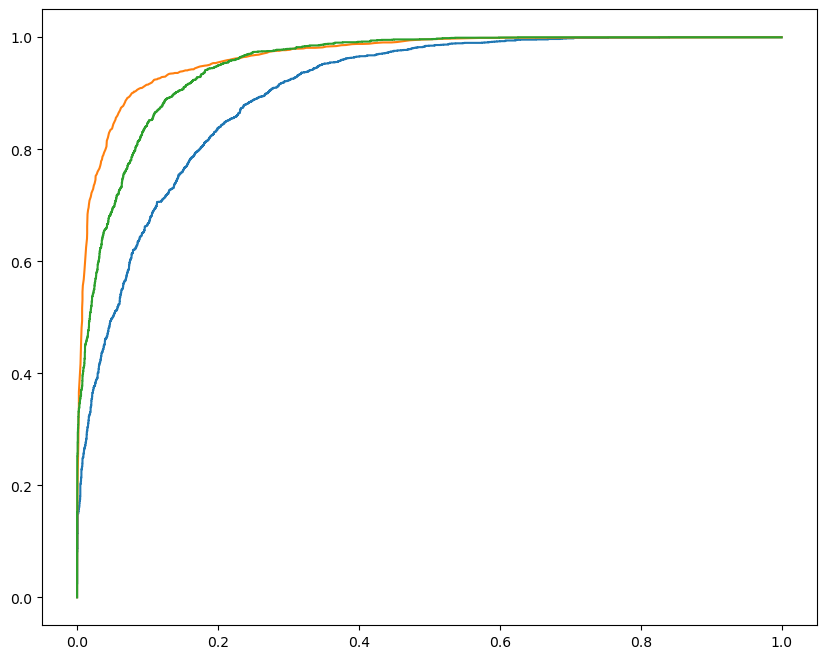

In [9]:
results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = (y_pred == y_test).mean()
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    results[name] = {
        "accuracy": acc,
        "auc": auc,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

📌 Step 8: Plot ROC Curve

C:\Users\bhanu\AppData\Local\Temp\ipykernel_10812\558536581.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


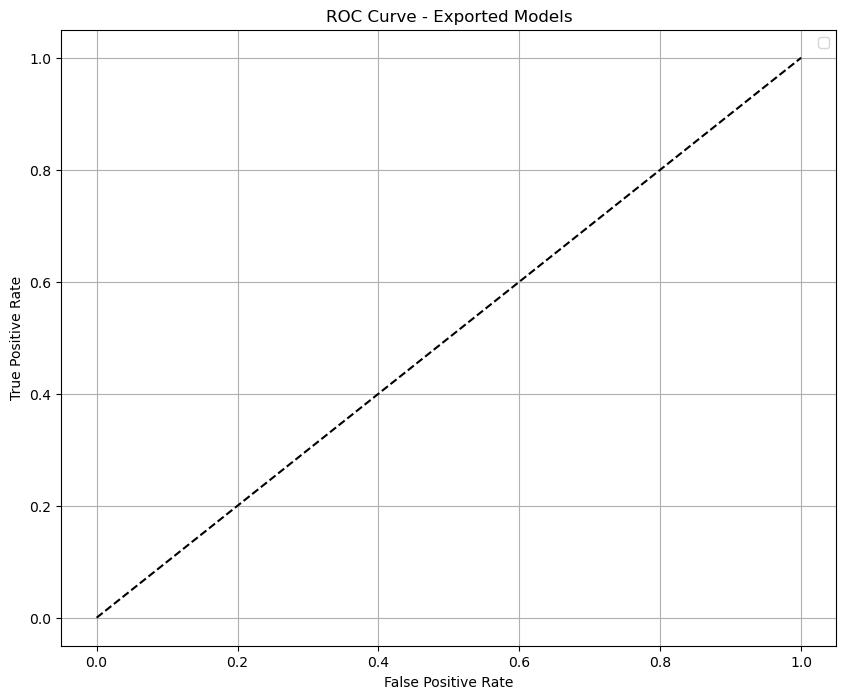

In [13]:
plt.figure(figsize=(10, 8))

# Plot ROC curves collected in Step 7
for name, res in results.items():
    y_proba = res.get('y_proba')
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = res['auc']
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Diagonal line (random chance)
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve - Exported Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


📌 Step 9: Summary Table

In [11]:
summary_df = pd.DataFrame({
    model: {
        'Accuracy': res['accuracy'],
        'ROC AUC': res['auc']
    }
    for model, res in results.items()
}).T

print("📊 Exported Model Performance Summary")
print(summary_df)

📊 Exported Model Performance Summary
                     Accuracy   ROC AUC
Logistic Regression  0.815418  0.902281
Random Forest        0.904023  0.966435
XGBoost              0.878378  0.951212


📌 Optional: Detailed Classification Reports

In [12]:
for model, res in results.items():
    print(f"\n🔍 Classification Report: {model}")
    print(pd.DataFrame(res['report']).T.round(2))


🔍 Classification Report: Logistic Regression
              precision  recall  f1-score  support
0                  0.85    0.84      0.85  3907.00
1                  0.77    0.77      0.77  2605.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.81    0.81      0.81  6512.00
weighted avg       0.82    0.82      0.82  6512.00

🔍 Classification Report: Random Forest
              precision  recall  f1-score  support
0                  0.94    0.89      0.92   3907.0
1                  0.85    0.92      0.88   2605.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.90    0.91      0.90   6512.0
weighted avg       0.91    0.90      0.90   6512.0

🔍 Classification Report: XGBoost
              precision  recall  f1-score  support
0                  0.91    0.88      0.90  3907.00
1                  0.83    0.88      0.85  2605.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.87    0.88      0.87  6512.00
weighted avg 